In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn

In [5]:
print("numpy:",np.__version__)
print("pandas:",np.__version__)
print("sklearn:",sklearn.__version__)

numpy: 1.26.4
pandas: 1.26.4
sklearn: 1.5.1


In [4]:
df = pd.read_csv("cleaned_eye_strain_dataset.csv")

In [5]:
df.head(5)

,Screen_Time_Hours,Breaks_Per_Hour,Eye_Redness,Dry_Eyes,Blurred_Vision,Age,Screen_Brightness,Work_Type,Eye_Strain_Level
0,7.0,5,1,1,0,34,59,Casual User,1
1,4.0,2,0,0,0,43,96,Software Engineer,1
2,11.0,4,0,0,0,31,42,Software Engineer,2
3,8.0,5,0,0,1,58,35,Student,1
4,5.0,0,1,0,0,53,80,Designer,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Screen_Time_Hours  1369 non-null   float64
 1   Breaks_Per_Hour    1369 non-null   int64  
 2   Eye_Redness        1369 non-null   int64  
 3   Dry_Eyes           1369 non-null   int64  
 4   Blurred_Vision     1369 non-null   int64  
 5   Age                1369 non-null   int64  
 6   Screen_Brightness  1369 non-null   int64  
 7   Work_Type          1369 non-null   object 
 8   Eye_Strain_Level   1369 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 96.4+ KB


In [7]:
df.isnull().sum()

Screen_Time_Hours    0
Breaks_Per_Hour      0
Eye_Redness          0
Dry_Eyes             0
Blurred_Vision       0
Age                  0
Screen_Brightness    0
Work_Type            0
Eye_Strain_Level     0
dtype: int64

In [8]:
df.shape

(1369, 9)

In [9]:
df.duplicated().sum()

78

In [10]:
df.describe()

,Screen_Time_Hours,Breaks_Per_Hour,Eye_Redness,Dry_Eyes,Blurred_Vision,Age,Screen_Brightness,Eye_Strain_Level
count,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000,1369.000000
mean,5.883126,1.818115,0.482104,0.566107,0.511322,36.522279,67.448503,2.238130
std,2.700079,1.834471,0.499862,0.495792,0.500054,11.299018,22.843810,1.315775
min,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,20.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,27.000000,49.000000,1.000000
50%,6.000000,1.000000,0.000000,1.000000,1.000000,36.000000,73.000000,2.000000
75%,8.000000,3.000000,1.000000,1.000000,1.000000,44.000000,87.000000,4.000000
max,11.000000,5.000000,1.000000,1.000000,1.000000,59.000000,100.000000,4.000000


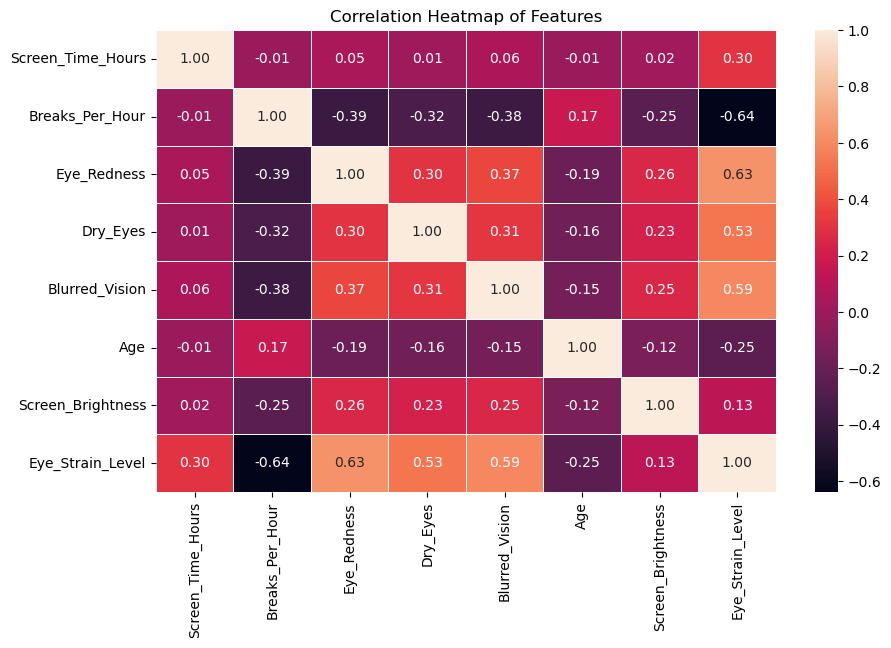

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cbar=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [12]:
df.corr(numeric_only=True)["Eye_Strain_Level"][:-1]

Screen_Time_Hours    0.296312
Breaks_Per_Hour     -0.638915
Eye_Redness          0.631108
Dry_Eyes             0.531646
Blurred_Vision       0.593618
Age                 -0.247186
Screen_Brightness    0.125948
Name: Eye_Strain_Level, dtype: float64

In [13]:
df.columns.to_list()

['Screen_Time_Hours',
 'Breaks_Per_Hour',
 'Eye_Redness',
 'Dry_Eyes',
 'Blurred_Vision',
 'Age',
 'Screen_Brightness',
 'Work_Type',
 'Eye_Strain_Level']

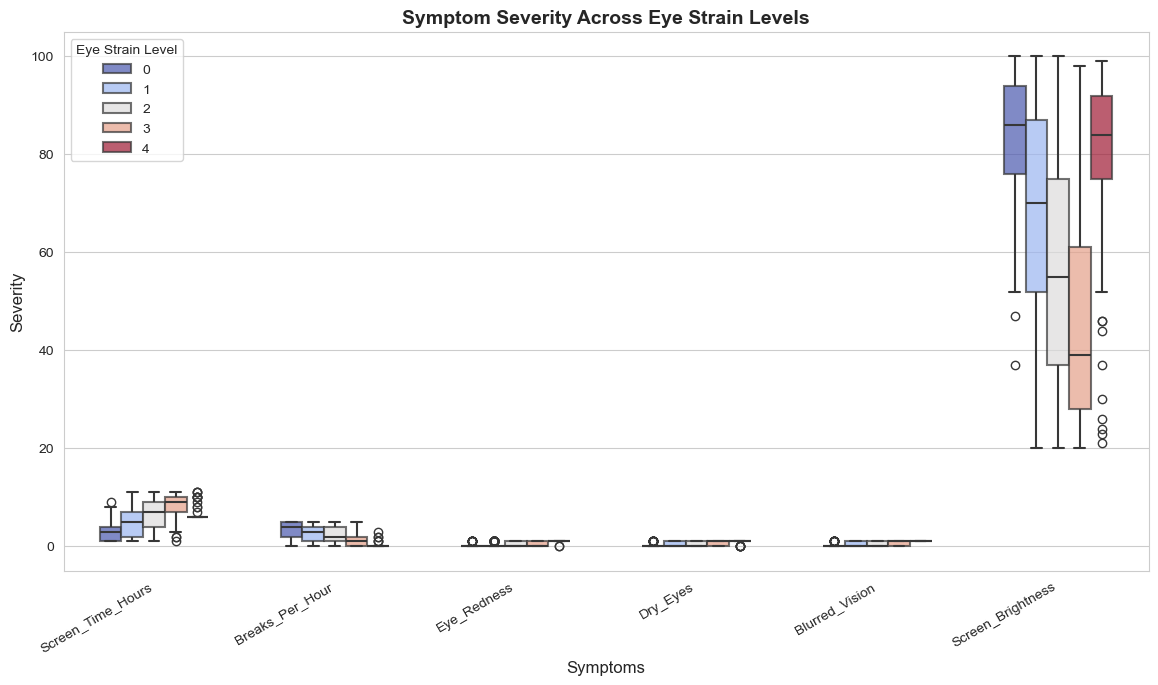

In [14]:
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

symptoms = ['Screen_Time_Hours', 'Breaks_Per_Hour', 'Eye_Redness', 'Dry_Eyes', 'Blurred_Vision', 'Screen_Brightness']
df_melted = df.melt(id_vars=['Eye_Strain_Level'], value_vars=symptoms)

flierprops = dict(marker='o', color='red', markersize=6)  # Red outliers

sns.boxplot(x='variable', y='value', hue='Eye_Strain_Level', data=df_melted, 
            palette='coolwarm', width=0.6, fliersize=6, linewidth=1.5, 
            flierprops=flierprops, boxprops={'alpha':0.7})

plt.title("Symptom Severity Across Eye Strain Levels", fontsize=14, fontweight='bold')
plt.xlabel("Symptoms", fontsize=12)
plt.ylabel("Severity", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title="Eye Strain Level")
plt.show()

In [15]:
df['Work_Type'].unique()

array(['Casual User', 'Software Engineer', 'Student', 'Designer'],
      dtype=object)

In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=True for large datasets
encoded_array = encoder.fit_transform(df[['Work_Type']])
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Work_Type']))
df = pd.concat([df.drop(columns=['Work_Type']), df_encoded], axis=1)


In [17]:
df.head(2)

,Screen_Time_Hours,Breaks_Per_Hour,Eye_Redness,Dry_Eyes,Blurred_Vision,Age,Screen_Brightness,Eye_Strain_Level,Work_Type_Casual User,Work_Type_Designer,Work_Type_Software Engineer,Work_Type_Student
0,7.0,5,1,1,0,34,59,1,1.0,0.0,0.0,0.0
1,4.0,2,0,0,0,43,96,1,0.0,0.0,1.0,0.0


In [18]:
y = df['Eye_Strain_Level']
X = df.drop('Eye_Strain_Level',axis=1)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score

# 🚀 Step 1: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🚀 Step 2: Apply SMOTE first, before scaling!
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 🚀 Step 3: Scale AFTER applying SMOTE
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# 🚀 Step 4: Train Logistic Regression (Baseline)
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_resampled, y_train_resampled)

# 🚀 Step 5: Train Random Forest (Alternative Model)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# 🚀 Step 6: Evaluate both models
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("🔹 Logistic Regression Performance 🔹")
print(classification_report(y_test, log_pred))
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_pred):.4f}")

print("\n🔹 Random Forest Performance 🔹")
print(classification_report(y_test, rf_pred))
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")


🔹 Logistic Regression Performance 🔹
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.96      0.96      0.96        73
           2       0.90      0.83      0.86        76
           3       0.64      0.82      0.72        28
           4       0.99      0.96      0.97        76

    accuracy                           0.91       274
   macro avg       0.90      0.91      0.90       274
weighted avg       0.92      0.91      0.91       274

Logistic Regression Accuracy: 0.9124

🔹 Random Forest Performance 🔹
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        21
           1       0.75      0.78      0.77        73
           2       0.70      0.75      0.72        76
           3       0.63      0.61      0.62        28
           4       1.00      0.96      0.98        76

    accuracy                           0.80       274
   macro avg       0.79    

In [20]:
X_train

,Screen_Time_Hours,Breaks_Per_Hour,Eye_Redness,Dry_Eyes,Blurred_Vision,Age,Screen_Brightness,Work_Type_Casual User,Work_Type_Designer,Work_Type_Software Engineer,Work_Type_Student
505,10.0,0,1,0,1,32,23,0.0,0.0,1.0,0.0
730,10.0,3,0,1,0,43,36,0.0,0.0,0.0,1.0
852,3.0,0,1,0,0,59,72,1.0,0.0,0.0,0.0
309,6.0,0,0,0,0,18,47,0.0,0.0,0.0,1.0
410,1.0,2,0,1,0,26,76,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
433,5.0,2,0,0,1,49,89,1.0,0.0,0.0,0.0
714,5.0,4,1,0,0,23,87,0.0,0.0,0.0,1.0
1156,6.0,0,1,1,1,34,84,0.0,0.0,1.0,0.0
1226,6.0,0,1,1,1,23,72,0.0,0.0,1.0,0.0


In [21]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
print(feature_importance.sort_values(by='Importance', ascending=False))


                        Feature  Importance
6             Screen_Brightness    0.201102
0             Screen_Time_Hours    0.190452
1               Breaks_Per_Hour    0.138665
5                           Age    0.083950
2                   Eye_Redness    0.072312
9   Work_Type_Software Engineer    0.071872
4                Blurred_Vision    0.065086
3                      Dry_Eyes    0.050497
7         Work_Type_Casual User    0.043733
10            Work_Type_Student    0.041284
8            Work_Type_Designer    0.041046


In [22]:
print("Train Accuracy:", rf_model.score(X_train, y_train))
print("Test Accuracy:", rf_model.score(X_test, y_test))


Train Accuracy: 0.1735159817351598
Test Accuracy: 0.7956204379562044


D:\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid, cv=5, n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


D:\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [24]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features='sqrt',  # Regularization
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                       random_state=42)

In [25]:
train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)
print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Train Accuracy: 0.8210045662100457
Test Accuracy: 0.6204379562043796


D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=7, random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


Gradient Boosting Accuracy: 0.7591240875912408


In [ ]:
df.tail(4)

In [ ]:
rf_model.predict([[12,5,1,1,0,23,55,1,0,0,0]])

In [ ]:
import joblib

# Assuming 'rf_model' is your trained Random Forest model
joblib.dump(rf_model, 'eye_strain_rf_model.pkl')
print("Model saved successfully!")


In [ ]:
# Load the saved model
rf_model_loaded = joblib.load('eye_strain_rf_model.pkl')
print("Model loaded successfully!")


In [ ]:
import os
print(os.getcwd())  # This shows the directory where the file is saved
